In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#mengimpor data
df = pd.read_excel('Section 1 - Produksi Padi per Provinsi.xlsx', sheet_name='Sheet1')
df.head()

,Provinsi,Tahun,Luas Lahan Panen Padi (ha Ribu),Curah Hujan (mm),Produksi Padi (100kg/ha)
0,Aceh,2013,419.1830,1623.6,46.68
1,Aceh,2014,376.1370,2264.4,48.39
2,Aceh,2015,461.0600,1575.0,50.56
3,Aceh,2016,429.4860,2398.3,52.35
4,Aceh,2017,470.3511,1610.4,53.04


In [2]:
# Informasi dasar dari data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Provinsi                         165 non-null    object 
 1   Tahun                            165 non-null    int64  
 2   Luas Lahan Panen Padi (ha Ribu)  165 non-null    float64
 3   Curah Hujan (mm)                 165 non-null    float64
 4   Produksi Padi (100kg/ha)         165 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 6.6+ KB


**Berdasarkan informasi tersebut, tidak ada nilai yang hilang, selanjutnya bisa melakukan drop kolom yang tidak dipakai**

In [3]:
# Drop kolom yang tidak dipakai
df_padi=df.drop(['Provinsi', 'Tahun'], axis=1)
df_padi.head()

,Luas Lahan Panen Padi (ha Ribu),Curah Hujan (mm),Produksi Padi (100kg/ha)
0,419.1830,1623.6,46.68
1,376.1370,2264.4,48.39
2,461.0600,1575.0,50.56
3,429.4860,2398.3,52.35
4,470.3511,1610.4,53.04


**Selanjutnya, melihat nilai statistik deskriptif dari data tersebut**

In [4]:
df_padi.describe()

,Luas Lahan Panen Padi (ha Ribu),Curah Hujan (mm),Produksi Padi (100kg/ha)
count,165.000000,165.000000,165.000000
mean,439.112356,2370.607939,46.204727
std,574.789750,839.393769,9.355127
min,0.186000,460.900000,22.850000
25%,91.195000,1762.300000,41.200000
50%,170.092400,2376.700000,47.650000
75%,503.198000,2838.400000,52.350000
max,2285.232000,5435.000000,62.140000


**Melihat korelasi antar-variabel apakah terdapat hubungan yang kuat**

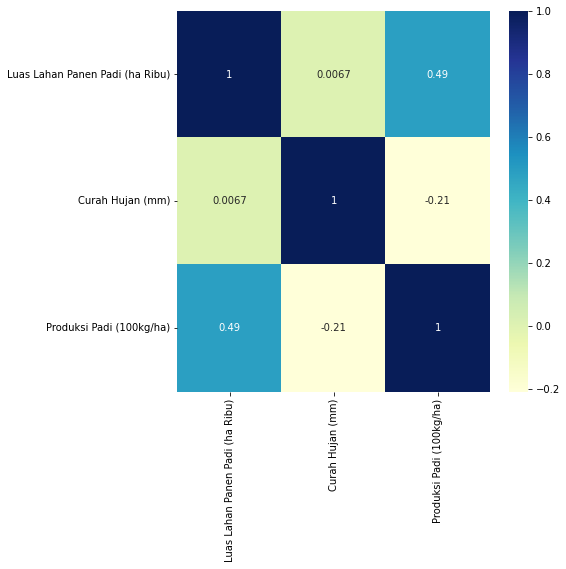

In [5]:
import seaborn as sns
plt.figure(figsize=(7, 7))
sns.heatmap(df_padi.corr(), annot=True,cmap="YlGnBu")

**Adanya tingkat korelasi yang cukup pada luas lahan dan produksi padi, sedangkan korelasi antar-variabel lainnya cukup lemah**

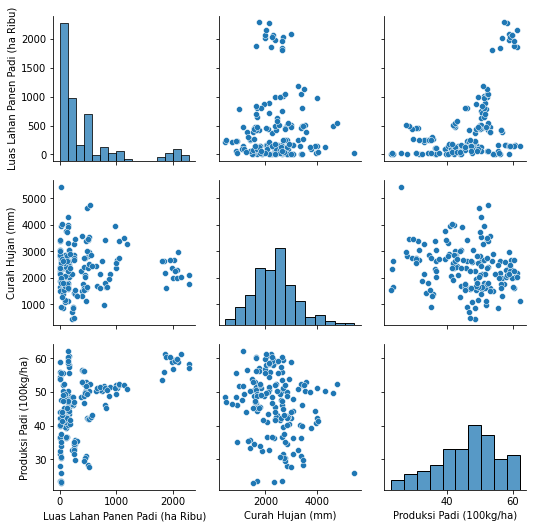

In [6]:
sns.pairplot(df_padi)

**Mengganti nama kolom data agar lebih mempermudah analisa**

In [7]:
df_padi= df_padi.rename({'Luas Lahan Panen Padi (ha Ribu)': 'Luas Lahan (X1)','Curah Hujan (mm)':'Curah Hujan (X2)','Produksi Padi (100kg/ha)':'Produksi Padi (Y)'}, axis=1)
df_padi.head()

,Luas Lahan (X1),Curah Hujan (X2),Produksi Padi (Y)
0,419.1830,1623.6,46.68
1,376.1370,2264.4,48.39
2,461.0600,1575.0,50.56
3,429.4860,2398.3,52.35
4,470.3511,1610.4,53.04


**Memisah data menjadi 80% data train dan 20% data test**

In [8]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df_padi, train_size = 0.8, test_size = 0.2, random_state = 100)

In [9]:
# Mendeklarasikan variabel data train dan test
y_train = df_train.pop('Produksi Padi (Y)')
X_train = df_train

**Membuat model regresi linear**

In [10]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Produksi Padi (Y)   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     27.36
Date:                Fri, 31 Dec 2021   Prob (F-statistic):           1.24e-10
Time:                        09:08:10   Log-Likelihood:                -455.68
No. Observations:                 132   AIC:                             917.4
Df Residuals:                     129   BIC:                             926.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               47.6412      2.141     22.250      0.000      43.405      51.877
Luas Lahan (X1)      0.0078      0.001      7.015      0.000       0.006       0.010
Curah Hujan (X2)    -0.0019      0.001     -2.298      0.023      -0.003      -0.000
==============================================================================
Omnibus:                        4.208   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.122   Jarque-Bera (JB):                3.646
Skew:                          -0.364   Prob(JB):                        0.162
Kurtosis:                       3.366   Cond. No.                     8.22e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Dari model tersebut, baik konstanta, luas lahan, dan curah hujan memiliki p-value yang lebih kecil dari 0,05 yang berarti ketiganya berpengaruh terhadap produksi padi. Tetapi nilai R^2 sangat kecil yaitu 0,287 artinya variasi yang bisa dijelaskan oleh model hanya 28,7%**

In [11]:
# Mengecek nilai VIF pada variabel apakah terdapat multikolinearitas 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Luas Lahan (X1),1.51
1,Curah Hujan (X2),1.51


**nilai VIF untuk semua variabel independen dibawah 10, artinya tidak terdapat gejala multikolinearitas antar variabel**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

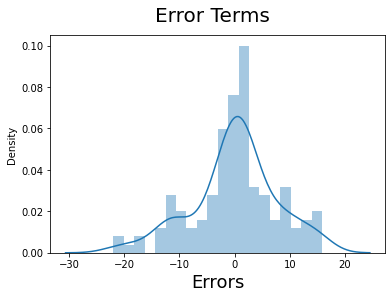

In [13]:
#membuat plot histogram dari nilai sisaan model
import seaborn as sns
y_train_price = lr_1.predict(X_train_lm)

fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

**Dari histogram tersebut, sisaan dari model cenderung mengikuti distribusi normal**

In [14]:
df_test.head()

,Luas Lahan (X1),Curah Hujan (X2),Produksi Padi (Y)
116,130.428,2835.0,48.91
32,128.833,2668.9,44.92
104,244.969,2684.0,31.51
96,452.242,2755.1,30.35
26,810.900,1668.3,45.26


**Selanjutnya melakukan pengujian data test dari model yang tersedia**

In [15]:
y_test = df_test.pop('Produksi Padi (Y)')
X_test = df_test

In [16]:
X_test_m1 = sm.add_constant(X_test)

In [17]:
y_pred_m1 = lr_1.predict(X_test_m1)

In [18]:
from sklearn.metrics import r2_score
r2_score(y_true = y_test, y_pred = y_pred_m1)

0.15762818905012954

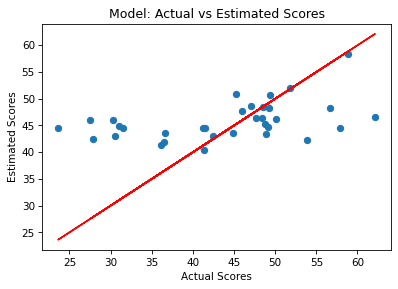

In [19]:
plt.figure(dpi = 75)
plt.scatter(y_test, y_pred_m1)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual Scores")
plt.ylabel("Estimated Scores")
plt.title("Model: Actual vs Estimated Scores")
plt.show()

In [20]:
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
print("Mean Absolute Error (MAE): {}".format(mean_absolute_error(y_test, y_pred_m1)))
print("Mean Squared Error (MSE) : {}".format(mse(y_test, y_pred_m1)))

Mean Absolute Error (MAE): 6.59258246934159
Mean Squared Error (MSE) : 79.85790926764675


**Hasil pemodelan pada data test menghasilkan model yang kurang sesuai dengan data (terlihat pada plot) dan nilai R^2 pada data test juga kecil sebesar 0,15. Model regresi bisa diterapkan pada data ini, namun hasil yang diberikan kurang bagus.**

**Karena model regresi kurang baik, akan dilakukan analisis lain berupa klasterisasi pada data Produksi Padi**

In [21]:
df_padi.head()

,Luas Lahan (X1),Curah Hujan (X2),Produksi Padi (Y)
0,419.1830,1623.6,46.68
1,376.1370,2264.4,48.39
2,461.0600,1575.0,50.56
3,429.4860,2398.3,52.35
4,470.3511,1610.4,53.04


In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
padi_std = scaler.fit_transform(df_padi)

In [24]:
#Melakukan Principal Component Analysis untuk menyederhanakan suatu data, dengan cara mentransformasi linear 
#sehingga terbentuk sistem koordinat baru dengan variansi maksimum
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(padi_std);

In [27]:
# evr menunjukkan variansi yang bisa dijelaskan dari 2 fitur
evr = pca.explained_variance_ratio_
evr

array([0.50970273, 0.33493258, 0.15536469])

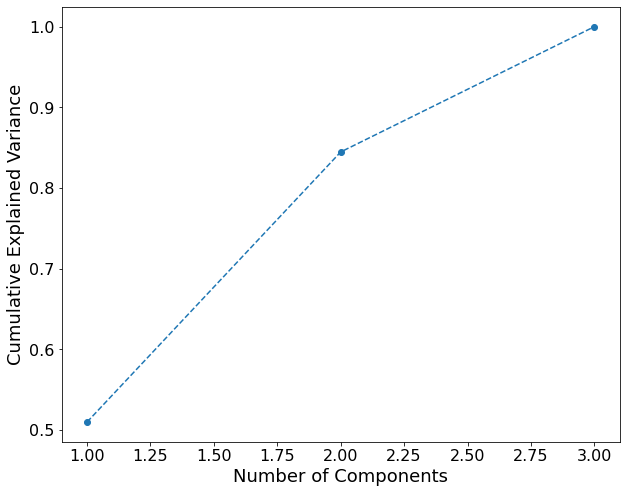

In [28]:
fig = plt.figure(figsize=(10,8))
plt.plot(range(1, len(df_padi.columns)+1), evr.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components', fontsize=18)
plt.ylabel('Cumulative Explained Variance',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [29]:
for i, exp_var in enumerate(evr.cumsum()):
    if exp_var >= 0.8:
        n_comps = i + 1
        break
print("Number of components:", n_comps)
pca = PCA(n_components=n_comps)
pca.fit(padi_std)
scores_pca = pca.transform(padi_std)

Number of components: 2


**Dari hasil PCA diperoleh 2 komponen dengan nilai variasi yang bisa dijelaskan diatas 80%**

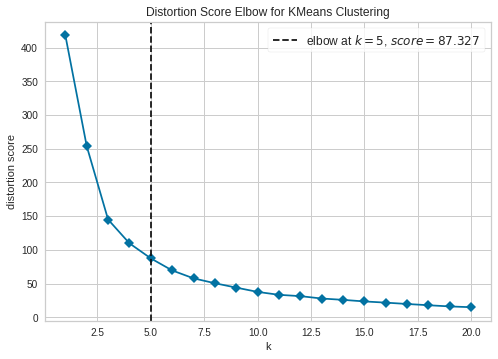

Optimal number of clusters: 5


In [30]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
visualizer = KElbowVisualizer(KMeans(init='k-means++', random_state=42), k=(1,21), timings=False)
visualizer.fit(scores_pca)
visualizer.show()
n_clusters = visualizer.elbow_value_
print("Optimal number of clusters:", n_clusters)

**Dengan metode elbow, diperoleh jumlah klaster yang optimal sebesar 5**

In [35]:
#melakukan klasterisasi dengan K-Means
kmeans_pca = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca);

In [36]:
df_seg_pca_kmeans = pd.concat([df_padi.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_seg_pca_kmeans.columns.values[(-1*n_comps):] = ["Component " + str(i+1) for i in range(n_comps)]
df_seg_pca_kmeans['Cluster'] = kmeans_pca.labels_
df_seg_pca_kmeans.head()

,Luas Lahan (X1),Curah Hujan (X2),Produksi Padi (Y),Component 1,Component 2,Cluster
0,419.1830,1623.6,46.68,0.254342,-0.835737,2
1,376.1370,2264.4,48.39,0.128655,-0.161795,4
2,461.0600,1575.0,50.56,0.612468,-0.864283,2
3,429.4860,2398.3,52.35,0.447055,0.018154,4
4,470.3511,1610.4,53.04,0.800059,-0.821329,4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


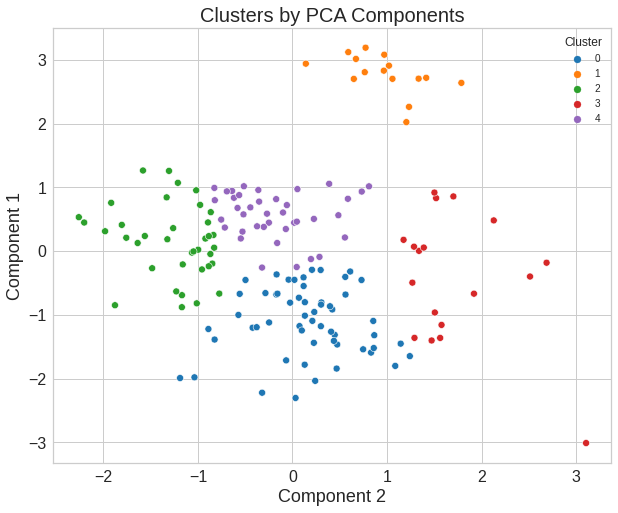

In [37]:
#Visualisasi hasil klasterisasi
x = df_seg_pca_kmeans['Component 2']
y = df_seg_pca_kmeans['Component 1']
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x, y, hue=df_seg_pca_kmeans['Cluster'], palette = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple'])
plt.title('Clusters by PCA Components', fontsize=20)
plt.xlabel("Component 2", fontsize=18)
plt.ylabel("Component 1", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [38]:
#Data hasil klasterisasi
df['Cluster'] = df_seg_pca_kmeans['Cluster']
df

,Provinsi,Tahun,Luas Lahan Panen Padi (ha Ribu),Curah Hujan (mm),Produksi Padi (100kg/ha),Cluster
0,Aceh,2013,419.1830,1623.6,46.68,2
1,Aceh,2014,376.1370,2264.4,48.39,4
2,Aceh,2015,461.0600,1575.0,50.56,2
3,Aceh,2016,429.4860,2398.3,52.35,4
4,Aceh,2017,470.3511,1610.4,53.04,4
...,...,...,...,...,...,...
160,Papua,2013,41.1110,4033.0,41.30,3
161,Papua,2014,45.4930,2731.0,43.09,0
162,Papua,2015,41.3540,1265.9,43.95,2
163,Papua,2016,50.5000,2631.0,47.21,0
